In [60]:
! pip install numpy
! pip install pandas
! pip install matplotlib
! pip install Ipython

In [61]:
#Import Relevant Modules
import re
from datetime import datetime, date
from time import sleep
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
from IPython.display import clear_output
import matplotlib.dates as mdates
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker

In [62]:
#Retrive today's date
date = date.today()

In [63]:
def getCCSPowerData(filename, PSU_ID):
    '''
    Extract CCS power supply data from txt file

    @param:
        filename -> str
    
    @return:
        3D list of time and CCS voltage/current -> list
    '''
    
    data = []                          
    powerPattern = re.compile(r'\[(\d{2}:\d{2}:\d{2})\].*?DEBUG: Power supply ' + PSU_ID + r' readings - Voltage: (\d*.\d*)V, Current: (\d*.\d*)A', re.I)
    
    with open(filename, "r") as f:
        for line in f:
            p = powerPattern.search(line)
            if p:
                time_str = p.group(1)
                voltage = p.group(2)
                current = p.group(3)
                log_time = datetime.strptime(time_str, "%H:%M:%S").time()

                data.append((log_time, voltage, current))
    return data

In [64]:
def getHVData(filename):
    '''
    Extract pressure data from txt file

    @param:
        filename -> str
    
    @return:
        2D list of time and HV current -> list
    '''
    
    data = []                          
    pressure_pattern = re.compile(r'\[\d{4}-\d{2}-\d{2} (.*?)\] Set: \d* V,  HV: \d* V,  I: ([\d\.]*) mA', re.I)
    
    with open(filename, "r") as f:
        for line in f:
            p = pressure_pattern.search(line)
            if p:
                time_str = p.group(1)
                current = p.group(2)
                log_time = datetime.strptime(time_str, "%H:%M:%S.%f").time()

                data.append((log_time, current))
    return data

In [65]:
def getCCSaTempData(filename):
    '''
    Extract CCS temperature data from txt file

    @param:
        filename -> str
    
    @return:
        2D list of Time and Pressure -> list
    '''
    
    data = []                          
    temp_pattern = re.compile(r'\[(\d{2}:\d{2}:\d{2})\].*?INFO: Unit 1 Temperature: (\d*.\d*) C', re.I)
    
    with open(filename, "r") as f:
        for line in f:
            p = temp_pattern.search(line)
            if p:
                time_str = p.group(1)
                temp = p.group(2)
                log_time = datetime.strptime(time_str, "%H:%M:%S").time()

                data.append((log_time, temp))
    return data

In [66]:
def getCCSbTempData(filename):
    '''
    Extract CCS temperature data from txt file

    @param:
        filename -> str
    
    @return:
        2D list of Time and Pressure -> list
    '''
    
    data = []                          
    temp_pattern = re.compile(r'\[(\d{2}:\d{2}:\d{2})\].*?INFO: Unit 2 Temperature: (\d*.\d*) C', re.I)
    
    with open(filename, "r") as f:
        for line in f:
            p = temp_pattern.search(line)
            if p:
                time_str = p.group(1)
                temp = p.group(2)
                log_time = datetime.strptime(time_str, "%H:%M:%S").time()

                data.append((log_time, temp))
    return data

In [67]:
def getCCScTempData(filename):
    '''
    Extract CCS temperature data from txt file

    @param:
        filename -> str
    
    @return:
        2D list of Time and Pressure -> list
    '''
    
    data = []                          
    temp_pattern = re.compile(r'\[(\d{2}:\d{2}:\d{2})\].*?INFO: Unit 3 Temperature: (\d*.\d*) C', re.I)
    
    with open(filename, "r") as f:
        for line in f:
            p = temp_pattern.search(line)
            if p:
                time_str = p.group(1)
                temp = p.group(2)
                log_time = datetime.strptime(time_str, "%H:%M:%S").time()

                data.append((log_time, temp))
    return data

In [68]:
def getPressureData(filename):
    '''
    Extract pressure data from txt file

    @param:
        filename -> str
    
    @return:
        2D list of Time and Pressure -> list
    '''
    
    data = []                          
    pressure_pattern = re.compile(r'\[(\d{2}:\d{2}:\d{2})\].*?pressure:\s*([0-9.]+E[-+]?\d+)', re.I)
    
    with open(filename, "r") as f:
        for line in f:
            p = pressure_pattern.search(line)
            if p:
                time_str = p.group(1)
                pressure = p.group(2)
                log_time = datetime.strptime(time_str, "%H:%M:%S").time()

                data.append((log_time, pressure))
    return data

In [69]:
def getPMONData(filename):
    '''
    Extract PMON Temperature data from txt file

    @param:
        filename -> str
    @return:
        list with data from each PMON
    '''
    
    data = [] 
    pmon_pattern = re.compile(r'\[(\d{2}:\d{2}:\d{2})\].*?PMON\s+temps:\s*(\{[^}]+\})', re.I)
    with open(filename, "r") as f:
        for line in f:
            p = pmon_pattern.search(line)
            if p:
                time_str = p.group(1)
                log_time = datetime.strptime(time_str, "%H:%M:%S").time()
                
                pmon_dict = eval(p.group(2))
                pmon_1 = pmon_dict[1]
                pmon_2 = pmon_dict[2]
                pmon_3 = pmon_dict[3]
                pmon_4 = pmon_dict[4]
                pmon_5 = pmon_dict[5]
                pmon_6 = pmon_dict[6]

                data.append((log_time, pmon_1, pmon_2, pmon_3, pmon_4, pmon_5, pmon_6))
    return data

In [70]:
def createCCSPowerCSV(ccs_data, psuID):
    '''

    @param:
    ccs_data: list of CCS power supply data -> list
    '''
    with open(f'ccs_psu_log-' + psuID + '-' + str(date) + '.csv', 'w', newline='') as out:
        writer = csv.writer(out)
        writer.writerow(['Time', 'Voltage (V)', 'Current (A)'])   # header
        writer.writerows(ccs_data)

    print(f'{len(ccs_data)} rows written to ccs_psu_log-' + psuID + '-' + str(date) + '.csv')

In [71]:
def createCCSaTempCSV(pressure_data):
    '''

    @param:
    pressure_data: list of data -> list
    '''
    #Using 'w' to overwrite existing
    with open(f'CCS_A_temp_log-'+ str(date) + '.csv', 'w', newline='') as out:
        writer = csv.writer(out)
        writer.writerow(['Time', 'Temperature (C)'])   # header
        writer.writerows(pressure_data)
        
    print(f'{len(pressure_data)} rows written to CCS_A_temp_log-'+ str(date) + '.csv')

In [72]:
def createCCSbTempCSV(pressure_data):
    '''

    @param:
    pressure_data: list of data -> list
    '''
    #Using 'w' to overwrite existing
    with open(f'CCS_B_temp_log-'+ str(date) + '.csv', 'w', newline='') as out:
        writer = csv.writer(out)
        writer.writerow(['Time', 'Temperature (C)'])   # header
        writer.writerows(pressure_data)
        
    print(f'{len(pressure_data)} rows written to CCS_B_temp_log-'+ str(date) + '.csv')

In [73]:
def createCCScTempCSV(pressure_data):
    '''

    @param:
    pressure_data: list of data -> list
    '''
    #Using 'w' to overwrite existing
    with open(f'CCS_C_temp_log-'+ str(date) + '.csv', 'w', newline='') as out:
        writer = csv.writer(out)
        writer.writerow(['Time', 'Temperature (C)'])   # header
        writer.writerows(pressure_data)
        
    print(f'{len(pressure_data)} rows written to CCS_C_temp_log-'+ str(date) + '.csv')

In [74]:
def createCurrentCSV(hv_data):
    '''

    @param:
    pressure_data: list of data -> list
    '''
    with open(f'HV_Current_log-'+ str(date) + '.csv', 'w', newline='') as out:
        writer = csv.writer(out)
        writer.writerow(['Time', 'Current (mA)'])   # header
        writer.writerows(hv_data)

    print(f'{len(hv_data)} rows written to HV_Current_log-'+ str(date) + '.csv')

In [75]:
def createPressureCSV(pressure_data):
    '''

    @param:
    pressure_data: list of data -> list
    '''
    #Using 'w' to overwrite existing
    with open(f'pressure_log-'+ str(date) + '.csv', 'w', newline='') as out:
        writer = csv.writer(out)
        writer.writerow(['Time', 'Pressure (mbar)'])   # header
        writer.writerows(pressure_data)
        
    print(f'{len(pressure_data)} rows written to pressure_log-'+ str(date) + '.csv')

In [76]:
def createPMONCSV(pmon_data):
    '''

    @param:
    pmon_data: list of data -> list
    '''
    with open(f'pmon_log-' + str(date) + '.csv', 'w', newline='') as out:
        writer = csv.writer(out)
        writer.writerow(['Time', 'PMON 1', 'PMON_2', 'PMON_3', 'PMON_4', 'PMON_5', 'PMON_6'])   # header
        writer.writerows(pmon_data)

    print(f'{len(pmon_data)} rows written to pmon_log-' + str(date) + '.csv')

In [91]:
def getGraph(pmon_csv, pressure_csv, hv_csv, CCSaTemp, CCSbTemp, CCScTemp, CCSaPSU, CCSbPSU, CCScPSU, start_time='00:00:01', end_time='23:59:59'):
    '''
    Displays Graph of PMON, pressure, and HV current (beam current) using multiple panes in one graph window
    Takes 

    args:
        pmon data : list of data -> list
        pressure_data : list of data -> list
        hvCurrent_data : list of data -> list
    
    '''
    ##############################################
    # Process PMON data into a graph-able format #
    ##############################################

    # Read data from CSV and convert timestamps into datetime format
    pmon_result = pd.read_csv(pmon_csv, parse_dates=['Time'])
    pmon_result['timestamp'] = pd.to_datetime(pmon_result['Time'], format='%H:%M:%S')
    pmon_result = pmon_result.to_numpy()
    time_DNE = False

    # Make a list with timestamps from pmon_result to use for graphing
    time = pd.to_datetime(pmon_result[:, 0], format='%H:%M:%S')
    pmon_data = {}

    # Try to make indexes for where to stop and start the graph
    try:
        start_index = time.tolist().index(str(start_time))
        end_index = time.tolist().index(str(end_time))
    except ValueError:
        print("Timeframe does not exist")
        time_DNE = True


    # Convert pmon_result into list of dictionaries
    ports = {1:'PMON_1', 2:'PMON_2', 3:'PMON_3', 4:'PMON_4', 5:'PMON_5', 6:'PMON_6'}

    for idx, value in ports.items():
        if time_DNE == True:
            pmon_data[value] = pmon_result[:, idx].tolist()
        elif time_DNE == False:
            pmon_data[value] = pmon_result[start_index:end_index, idx].tolist()
            
    if time_DNE == False:
        time = time[start_index:end_index]

    # Fill data points that are disconnected with previous value
    for key in ports.values():
        if pmon_data[key][0] in ['DISCONNECTED','SENSOR_ERROR', 'None']:
            pmon_data[key] = [float(x) for x in pmon_data[key] if x not in ('DISCONNECTED','SENSOR_ERROR', 'None')]
        else:
            for i in range(len(pmon_data[key])):
                if pmon_data[key][i] in ['DISCONNECTED','SENSOR_ERROR','None']:
                    pmon_data[key][i] = pmon_data[key][i - 1]
            pmon_data[key] = [float(x) for x in pmon_data[key]]

    #########################################################
    # Process CCS Temperature data into a graph-able format #
    #########################################################
    CCSaTemp_result = pd.read_csv(CCSaTemp, parse_dates=['Time'])
    CCSbTemp_result = pd.read_csv(CCSbTemp, parse_dates=['Time'])
    CCScTemp_result = pd.read_csv(CCScTemp, parse_dates=['Time'])

    # Filter by time range
    filtered_ccsA_temp = CCSaTemp_result[(CCSaTemp_result['Time'] >= start_time) & (CCSaTemp_result['Time'] <= end_time)]
    filtered_ccsB_temp = CCSbTemp_result[(CCSbTemp_result['Time'] >= start_time) & (CCSbTemp_result['Time'] <= end_time)]
    filtered_ccsC_temp = CCScTemp_result[(CCScTemp_result['Time'] >= start_time) & (CCScTemp_result['Time'] <= end_time)]

    #########################################################
    # Process CCS PSU data into a graph-able format #
    #########################################################
    CCSaPSU_result = pd.read_csv(CCSaPSU, parse_dates=['Time'])
    CCSbPSU_result = pd.read_csv(CCSbPSU, parse_dates=['Time'])
    CCScPSU_result = pd.read_csv(CCScPSU, parse_dates=['Time'])

    # Filter by time range
    filtered_CCSaPSU = CCSaPSU_result[(CCSaPSU_result['Time'] >= start_time) & (CCSaPSU_result['Time'] <= end_time)]
    filtered_CCSbPSU = CCSbPSU_result[(CCSbPSU_result['Time'] >= start_time) & (CCSbPSU_result['Time'] <= end_time)]
    filtered_CCScPSU = CCScPSU_result[(CCScPSU_result['Time'] >= start_time) & (CCScPSU_result['Time'] <= end_time)]
    
    
    ##################################################
    # Process pressure data into a graph-able format #
    ##################################################
    pressure_result = pd.read_csv(pressure_csv, parse_dates=['Time'])

    # Filter by time range
    filtered_pressure = pressure_result[(pressure_result['Time'] >= start_time) & (pressure_result['Time'] <= end_time)]


    ####################################################
    # Process HV current data into a graph-able format #
    ####################################################

    current_result = pd.read_csv(hv_csv, parse_dates=['Time'])

    # Filter by time range
    filtered_current = current_result[(current_result['Time'] >= start_time) & (current_result['Time'] <= end_time)]


    ###################
    # Graph the data! #
    ###################

    # Set graph details, including figure aspect ratio and graph height ratios
    fig, axs = plt.subplots(6, 1, figsize=(16, 9), sharex=True)

    # --- PMON plot ---
    for key in ports.values():
        if(time.size == len(pmon_data[key])) :
            axs[0].plot(time, pmon_data[key], label=key)
    axs[0].set_ylabel('PMON Temperatures')
    axs[0].legend(loc='upper left')
    axs[0].grid(True)

    # CCS Temperature plot
    axs[1].plot(filtered_ccsA_temp['Time'].to_numpy(), filtered_ccsA_temp['Temperature (C)'].to_numpy(), label='CCS A')
    axs[1].plot(filtered_ccsB_temp['Time'].to_numpy(), filtered_ccsB_temp['Temperature (C)'].to_numpy(), label='CCS B')
    axs[1].plot(filtered_ccsC_temp['Time'].to_numpy(), filtered_ccsC_temp['Temperature (C)'].to_numpy(), label='CCS C')
    axs[1].set_ylabel('CCS Temperatures')
    axs[1].legend(loc='upper left')
    

    # --- Pressure plot ---
    axs[2].plot(filtered_pressure['Time'].to_numpy(), filtered_pressure['Pressure (mbar)'].to_numpy())
    axs[2].set_ylabel('Pressure (mbar)')
    axs[2].grid(True)

    # --- HV Current plot ---
    axs[3].plot(filtered_current['Time'].to_numpy(), filtered_current['Current (mA)'].to_numpy())
    axs[3].set_ylabel('Current (mA)')
    axs[3].grid(True)

    # CCS voltage plot
    axs[4].plot(filtered_CCSaPSU['Time'].to_numpy(), filtered_CCSaPSU['Voltage (V)'].to_numpy(), label='CCS A')
    axs[4].plot(filtered_CCSbPSU['Time'].to_numpy(), filtered_CCSbPSU['Voltage (V)'].to_numpy(), label='CCS B')
    axs[4].plot(filtered_CCScPSU['Time'].to_numpy(), filtered_CCScPSU['Voltage (V)'].to_numpy(), label='CCS C')
    axs[4].set_ylabel('CCS Voltages')
    axs[4].legend(loc='upper left')

    # CCS current plot
    axs[5].plot(filtered_CCSaPSU['Time'].to_numpy(), filtered_CCSaPSU['Current (A)'].to_numpy(), label='CCS A')
    axs[5].plot(filtered_CCSbPSU['Time'].to_numpy(), filtered_CCSbPSU['Current (A)'].to_numpy(), label='CCS B')
    axs[5].plot(filtered_CCScPSU['Time'].to_numpy(), filtered_CCScPSU['Current (A)'].to_numpy(), label='CCS C')
    axs[5].set_ylabel('CCS Currents')
    axs[5].legend(loc='upper left')

    # Format x-axis to show only the time (HH:MM)
    time_format = mdates.DateFormatter('%H:%M:%S')
    axs[5].xaxis.set_major_formatter(time_format)


    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


258 rows written to pmon_log-2025-06-18.csv
257 rows written to pressure_log-2025-06-18.csv
0 rows written to HV_Current_log-2025-06-18.csv
0 rows written to CCS_A_temp_log-2025-06-18.csv
0 rows written to CCS_B_temp_log-2025-06-18.csv
0 rows written to CCS_C_temp_log-2025-06-18.csv
8 rows written to ccs_psu_log-1-2025-06-18.csv
8 rows written to ccs_psu_log-2-2025-06-18.csv
8 rows written to ccs_psu_log-3-2025-06-18.csv
Timeframe does not exist


C:\Users\Experiment\AppData\Local\Temp\ipykernel_23028\509622081.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pmon_result = pd.read_csv(pmon_csv, parse_dates=['Time'])
C:\Users\Experiment\AppData\Local\Temp\ipykernel_23028\509622081.py:72: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  CCSaPSU_result = pd.read_csv(CCSaPSU, parse_dates=['Time'])
C:\Users\Experiment\AppData\Local\Temp\ipykernel_23028\509622081.py:73: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  CCSbPSU_result = pd.read_csv(CCSbPSU, parse_dates=['Time'])
C:\Users\Experiment\AppData\Local\Temp\ipykernel

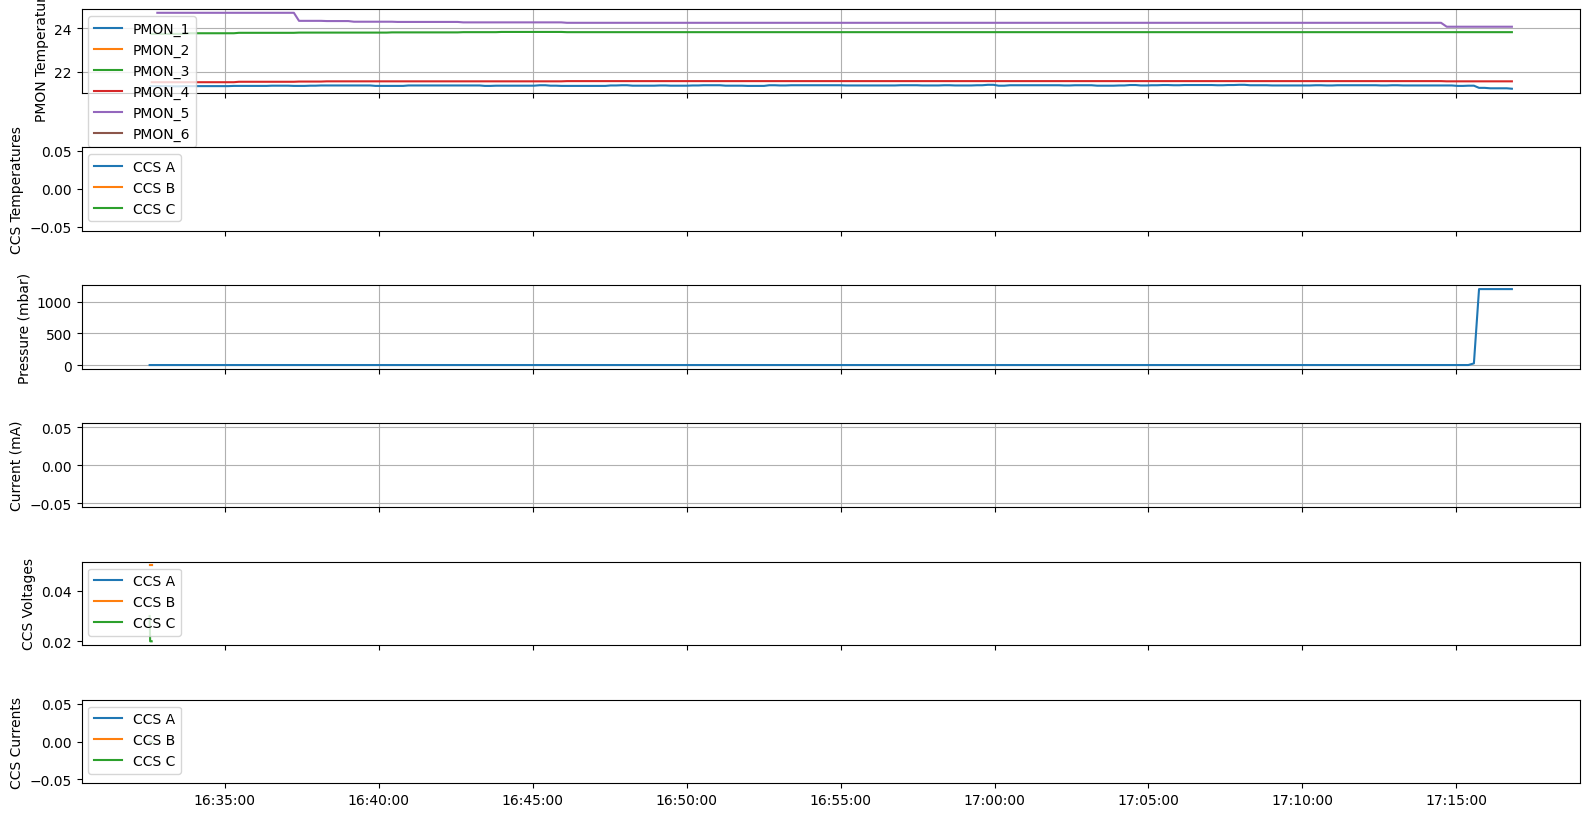

In [94]:
# Log file location on laptop: 'C:/Users/Experiment/EBEAM_dashboard/EBEAM-Dashboard-Logs/'
# Tera term log file location on laptop: 'C:/Users/Experiment/cbmark_logger/Tera Term logs'

# Enter your Ebeam dashboard and Tera Term log files here and comment out the following 4 lines to use a specific file
# dashboard_log_file = 'C:/Users/Experiment/EBEAM_dashboard/EBEAM-Dashboard-Logs/log_2025-06-18_16-12-00.txt'
# teraTerm_log_file = 'Data samples/Blank.txt'

# Pick the most recently edited Tera Term log file
teraTerm_files = glob.glob("C:/Users/Experiment/cbmark_logger/Tera Term logs/*")
teraTerm_log_file = max(teraTerm_files, key=os.path.getctime)

# Pick the most recently edited dashboard log file
dashboard_files = glob.glob("C:/Users/Experiment/EBEAM_dashboard/EBEAM-Dashboard-Logs/*")
dashboard_log_file = max(dashboard_files, key=os.path.getctime)

# If you want to use a CSV that wasn't generated right now, you'll need to change these
pmon_csv = f'pmon_log-' + str(date) + '.csv'
pressure_csv = f'pressure_log-'+ str(date) + '.csv'
hvCurrent_csv = f'HV_Current_log-'+ str(date) + '.csv'
CCSaTemp = f'CCS_A_temp_log-'+ str(date) + '.csv'
CCSbTemp = f'CCS_A_temp_log-'+ str(date) + '.csv'
CCScTemp = f'CCS_A_temp_log-'+ str(date) + '.csv'
CCSaPSU = f'ccs_psu_log-' + '1' + '-' + str(date) + '.csv'
CCSbPSU = f'ccs_psu_log-' + '2' + '-' + str(date) + '.csv'
CCScPSU = f'ccs_psu_log-' + '3' + '-' + str(date) + '.csv'

# Create the CSV files
createPMONCSV(getPMONData(dashboard_log_file))
createPressureCSV(getPressureData(dashboard_log_file))
createCurrentCSV(getHVData(teraTerm_log_file))
createCCSaTempCSV(getCCSaTempData(dashboard_log_file))
createCCSbTempCSV(getCCSbTempData(dashboard_log_file))
createCCScTempCSV(getCCScTempData(dashboard_log_file))
createCCSPowerCSV(getCCSPowerData(dashboard_log_file, '1'), '1')
createCCSPowerCSV(getCCSPowerData(dashboard_log_file, '2'), '2')
createCCSPowerCSV(getCCSPowerData(dashboard_log_file, '3'), '3')

# Call the function to generate the graph
getGraph(pmon_csv, pressure_csv, hvCurrent_csv, CCSaTemp, CCSbTemp, CCScTemp, CCSaPSU, CCSbPSU, CCScPSU)




275 rows written to pmon_log-2025-06-18.csv
274 rows written to pressure_log-2025-06-18.csv
0 rows written to HV_Current_log-2025-06-18.csv
0 rows written to CCS_A_temp_log-2025-06-18.csv
0 rows written to CCS_B_temp_log-2025-06-18.csv
0 rows written to CCS_C_temp_log-2025-06-18.csv
8 rows written to ccs_psu_log-1-2025-06-18.csv
8 rows written to ccs_psu_log-2-2025-06-18.csv
8 rows written to ccs_psu_log-3-2025-06-18.csv
Timeframe does not exist


C:\Users\Experiment\AppData\Local\Temp\ipykernel_23028\509622081.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pmon_result = pd.read_csv(pmon_csv, parse_dates=['Time'])
C:\Users\Experiment\AppData\Local\Temp\ipykernel_23028\509622081.py:72: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  CCSaPSU_result = pd.read_csv(CCSaPSU, parse_dates=['Time'])
C:\Users\Experiment\AppData\Local\Temp\ipykernel_23028\509622081.py:73: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  CCSbPSU_result = pd.read_csv(CCSbPSU, parse_dates=['Time'])
C:\Users\Experiment\AppData\Local\Temp\ipykernel

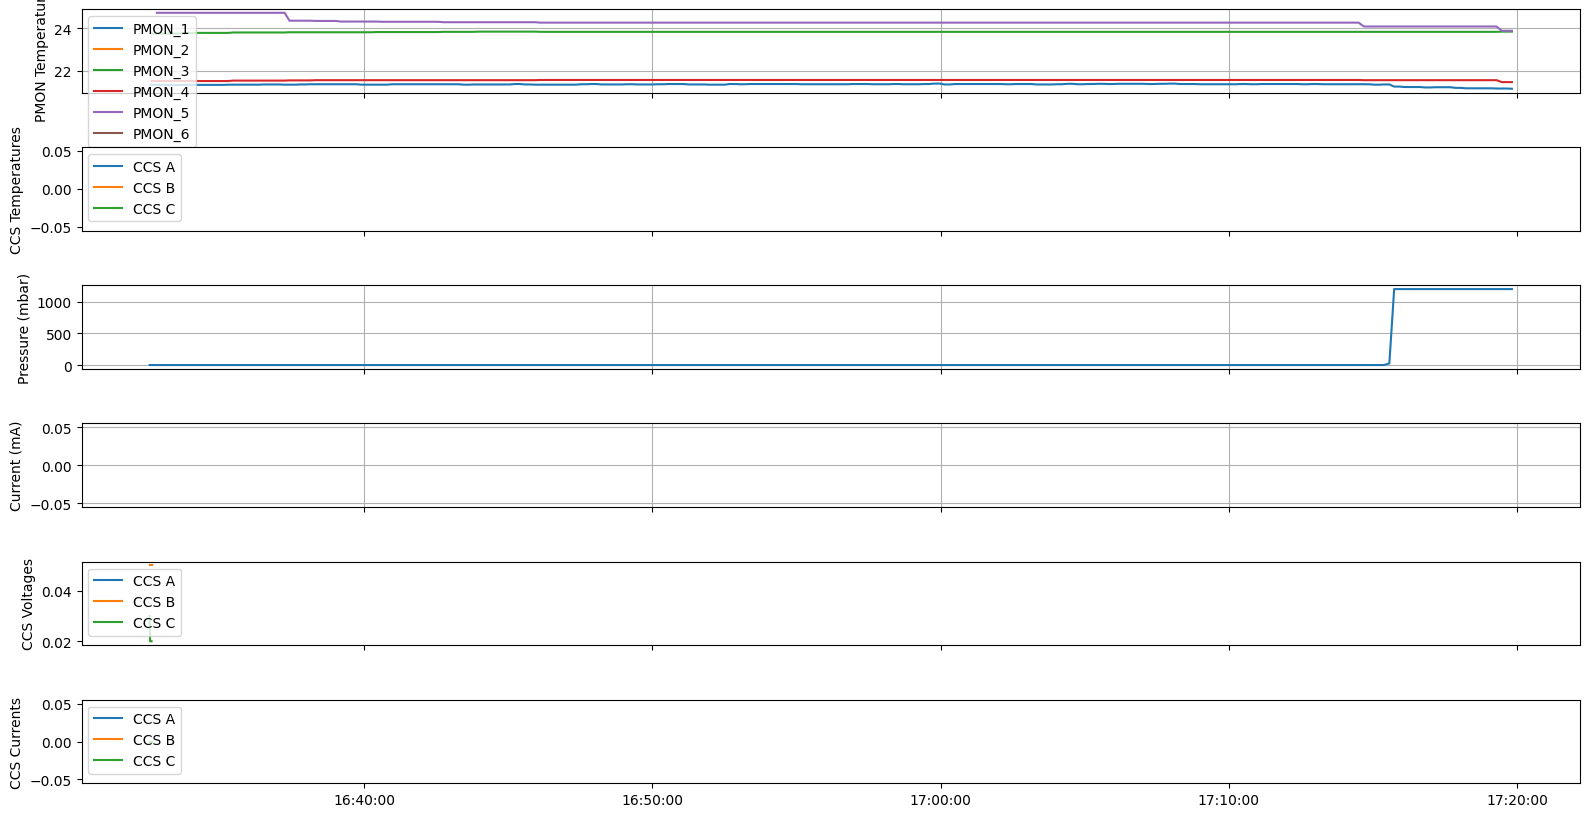

In [ ]:
# Log file location on laptop: 'C:/Users/Experiment/EBEAM_dashboard/EBEAM-Dashboard-Logs/'
# Tera term log file location on laptop: 'C:/Users/Experiment/cbmark_logger/Tera Term logs'

# Enter your Ebeam dashboard and Tera Term log files here and comment out the following 4 lines to use a specific file
# dashboard_log_file = 'C:/Users/Experiment/EBEAM_dashboard/EBEAM-Dashboard-Logs/log_2025-06-13_13-24-00.txt'
# teraTerm_log_file = 'Data samples/HV_monitor 2025-06-10.txt'

while 1 :
    # Pick the most recently edited Tera Term log file
    teraTerm_files = glob.glob("C:/Users/Experiment/cbmark_logger/Tera Term logs/*")
    teraTerm_log_file = max(teraTerm_files, key=os.path.getctime)

    # Pick the most recently edited dashboard log file
    dashboard_files = glob.glob("C:/Users/Experiment/EBEAM_dashboard/EBEAM-Dashboard-Logs/*")
    dashboard_log_file = max(dashboard_files, key=os.path.getctime)

    # If you want to use a CSV that wasn't generated right now, you'll need to change these
    pmon_csv = f'pmon_log-' + str(date) + '.csv'
    pressure_csv = f'pressure_log-'+ str(date) + '.csv'
    hvCurrent_csv = f'HV_Current_log-'+ str(date) + '.csv'
    CCSaTemp = f'CCS_A_temp_log-'+ str(date) + '.csv'
    CCSbTemp = f'CCS_A_temp_log-'+ str(date) + '.csv'
    CCScTemp = f'CCS_A_temp_log-'+ str(date) + '.csv'
    CCSaPSU = f'ccs_psu_log-' + '1' + '-' + str(date) + '.csv'
    CCSbPSU = f'ccs_psu_log-' + '2' + '-' + str(date) + '.csv'
    CCScPSU = f'ccs_psu_log-' + '3' + '-' + str(date) + '.csv'

    # Create the CSV files
    createPMONCSV(getPMONData(dashboard_log_file))
    createPressureCSV(getPressureData(dashboard_log_file))
    createCurrentCSV(getHVData(teraTerm_log_file))
    createCCSaTempCSV(getCCSaTempData(dashboard_log_file))
    createCCSbTempCSV(getCCSbTempData(dashboard_log_file))
    createCCScTempCSV(getCCScTempData(dashboard_log_file))
    createCCSPowerCSV(getCCSPowerData(dashboard_log_file, '1'), '1')
    createCCSPowerCSV(getCCSPowerData(dashboard_log_file, '2'), '2')
    createCCSPowerCSV(getCCSPowerData(dashboard_log_file, '3'), '3')

    # Call the function to generate the graph
    getGraph(pmon_csv, pressure_csv, hvCurrent_csv, CCSaTemp, CCSbTemp, CCScTemp, CCSaPSU, CCSbPSU, CCScPSU)
    sleep(5)
    clear_output(wait=True)